In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter('ignore')

In [2]:
import os

print(os.getcwd())

os.listdir(os.getcwd())

C:\Users\salim\Documents\Capstone Projects\Project 2 -Healthcare PGP


['.ipynb_checkpoints',
 'health care diabetes.csv',
 'Heat Map.csv',
 'Project 2 - Healthcare PGP.ipynb']

In [3]:
df = pd.read_csv('health care diabetes.csv')

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.describe() #we can't relay on this because it consists of missing values ie 0 here

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
df.corr() #we can't relay on this because it consists of missing values ie 0 here

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

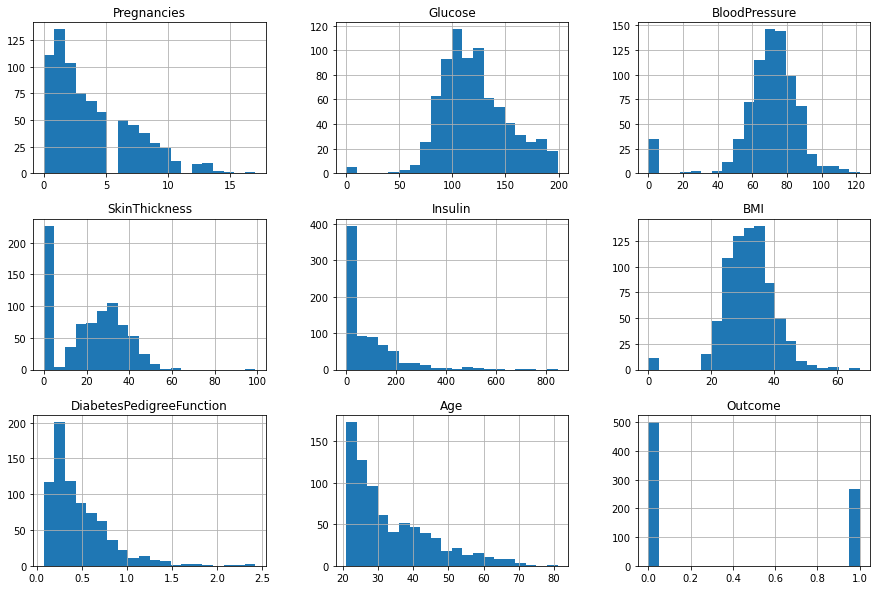

In [10]:
df.hist(bins=20, figsize = (15,10));

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df[df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
#Checking percentage of missing values ie 0 here

(df[df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0].count()/len(df))*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [14]:
df['Insulin'].median()  #This median value conists of 0 as well. hence we need to omit 0 and need to cal median value

30.5

In [15]:
df[df['Insulin']!=0]['Insulin'].median()

125.0

In [16]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    
    print(i,"Old Median:",df[i].median())
    
    median_value=df[df[i]!=0][i].median()
    
    print(i,"New Median after omitting zero's:",median_value,'\n')
    
    df[i].replace(0,median_value,inplace=True)

Glucose Old Median: 117.0
Glucose New Median after omitting zero's: 117.0 

BloodPressure Old Median: 72.0
BloodPressure New Median after omitting zero's: 72.0 

SkinThickness Old Median: 23.0
SkinThickness New Median after omitting zero's: 29.0 

Insulin Old Median: 30.5
Insulin New Median after omitting zero's: 125.0 

BMI Old Median: 32.0
BMI New Median after omitting zero's: 32.3 



In [17]:
#Cross check

df[df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

<AxesSubplot:ylabel='count'>

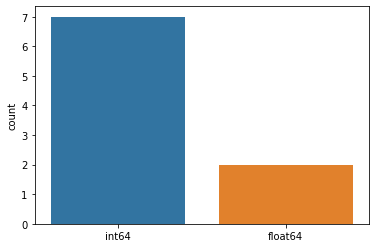

In [19]:
sns.countplot(df.dtypes)

In [20]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
df.Outcome.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

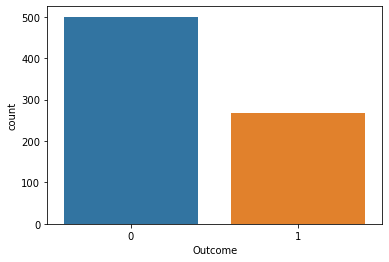

In [22]:
sns.countplot(df.Outcome)

#Values are not drastically imbalance hence proceeding without any action. If it has 90:10 or 90:5 then i would have go
#for undersampling techniques

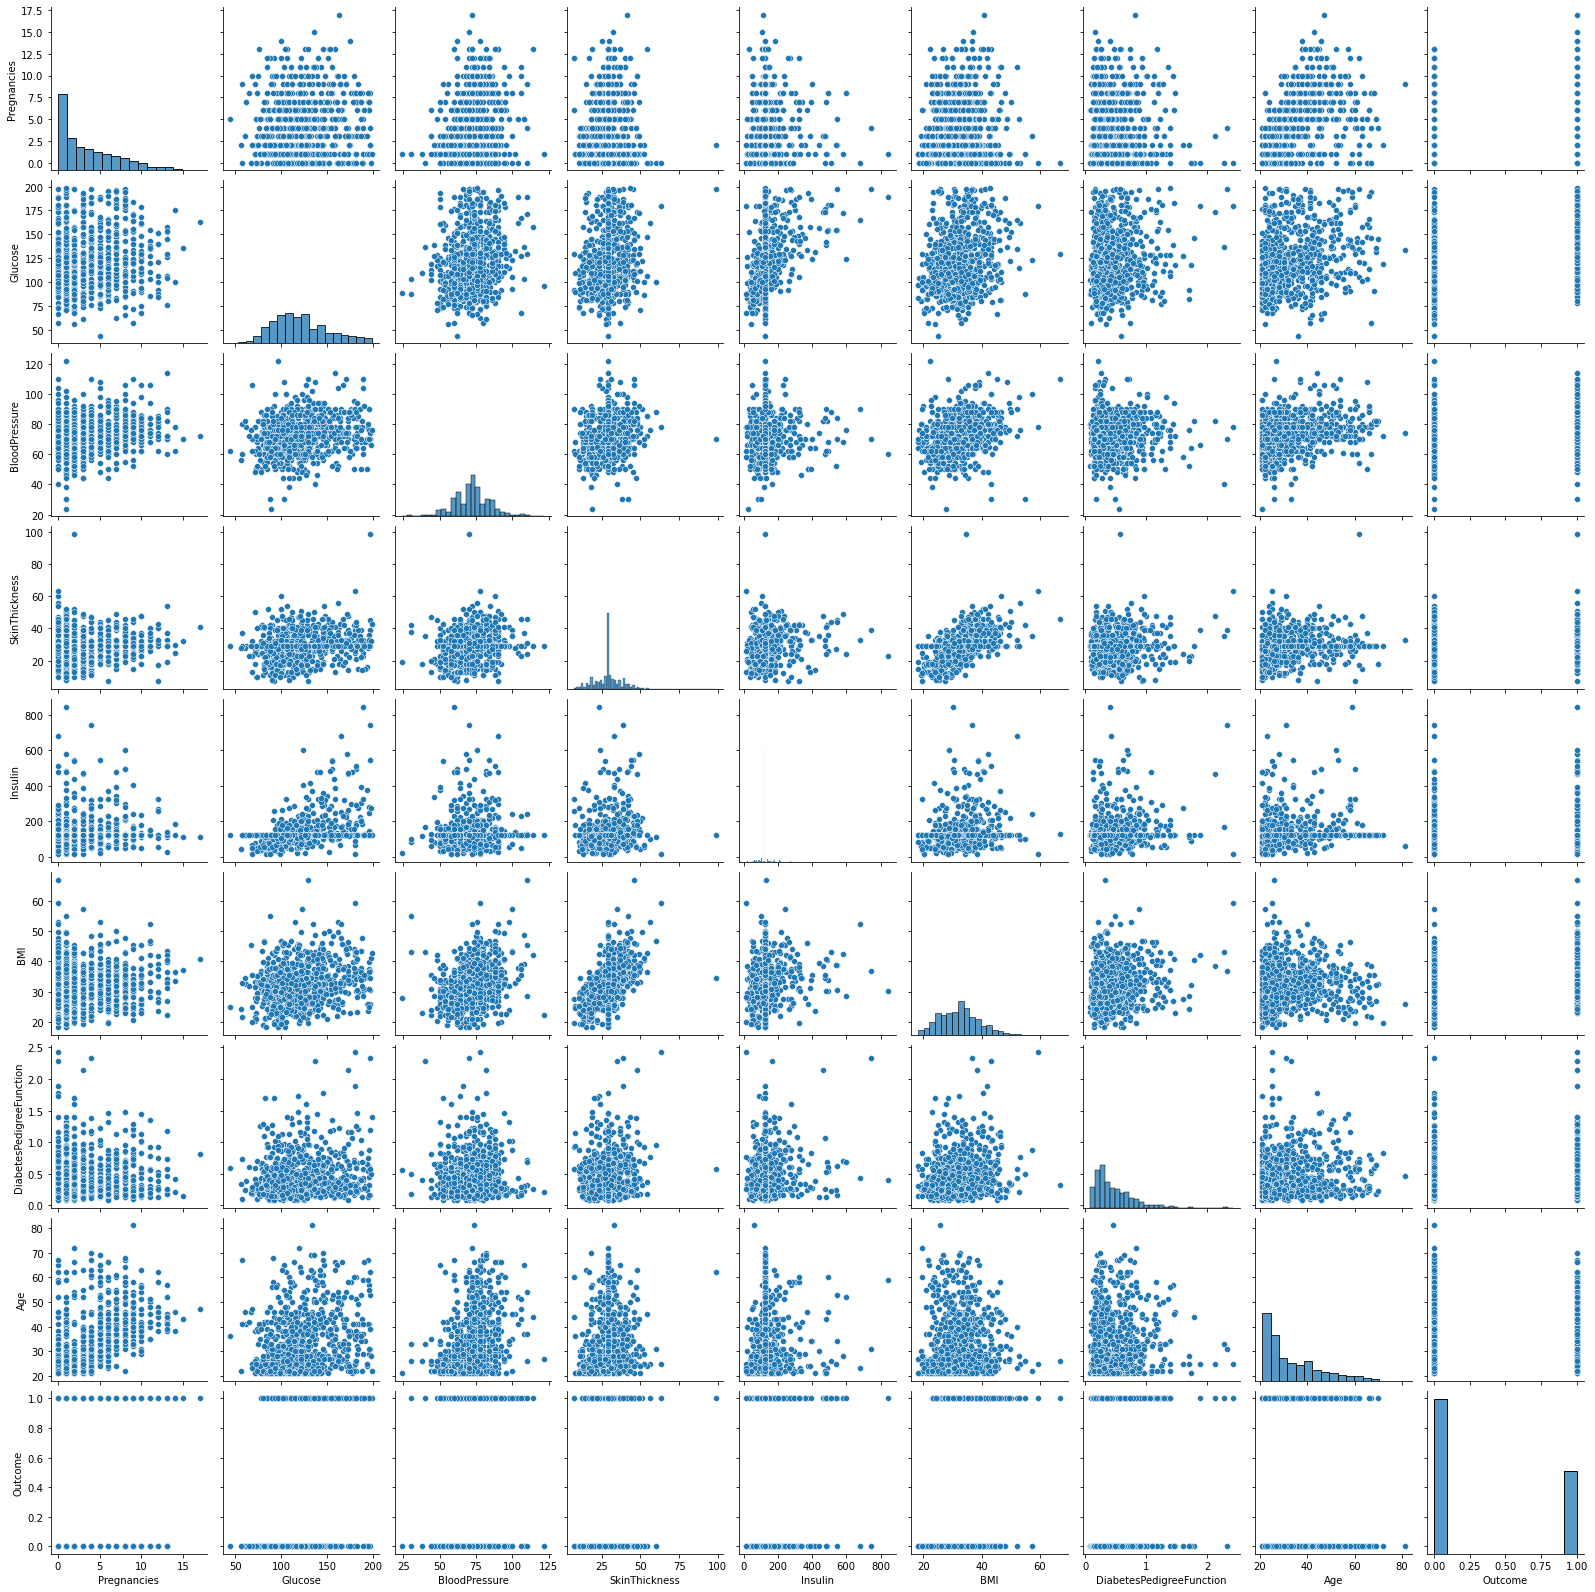

In [23]:
sns.pairplot(df)

#Findings
#all variables have some relation.
#We see BMI and SkinThickness has positive linear relationship

In [24]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [25]:
df.corr().to_csv('Heat Map.csv') #saving the correlation values for tableau for final presentation

<AxesSubplot:>

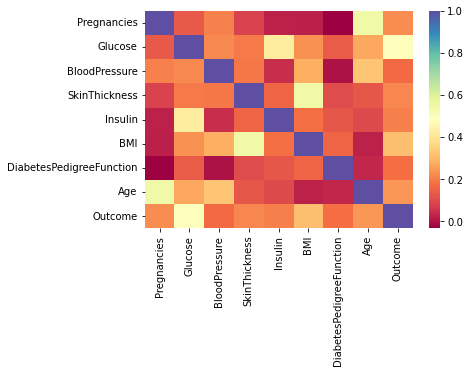

In [26]:
sns.heatmap(df.corr(), cmap ='Spectral')

In [27]:
df.Outcome.value_counts() #Here need to use stratify to get homogeneous groups of train & test

0    500
1    268
Name: Outcome, dtype: int64

In [28]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=22,stratify=y)

#Stratify is used to preserves the ratio of the dependent variable in train/test

In [30]:
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


In [31]:
y_train.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [32]:
y_test.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

#### KNN algorithm

In [33]:
#scalling is a pre-requisite for KNN Algorithm. Hence performing scaling

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

scaler = StandardScaler()

In [34]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

<AxesSubplot:>

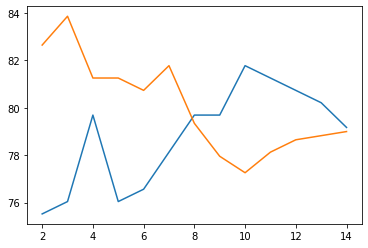

In [35]:
#Checking which k value is best for for KNN model

acc_test = []

acc_train = []

ran = range(2,15)

for k in ran:
    
    knn_model = KNeighborsClassifier(n_neighbors = k)
    
    knn_model.fit(x_train_sc,y_train)
    
    acc1 = accuracy_score(y_test,knn_model.predict(x_test_sc))
    acc2 = accuracy_score(y_train,knn_model.predict(x_train_sc))
    
    acc_test.append(acc1*100)
    acc_train.append(acc2*100)
    
sns.lineplot(ran,acc_test)  #Blue line is for test accuracy
sns.lineplot(ran,acc_train) #Orange line is for train accuracy

#When k value is 8 ie 8 clusters, the model is performing accurately without overfitting or underfitting
#Hence going to build the KNN model with k = 8

In [36]:
knn_model = KNeighborsClassifier(n_neighbors = 8)

In [37]:
knn_model.fit(x_train_sc,y_train)

KNeighborsClassifier(n_neighbors=8)

In [38]:
y_pred = knn_model.predict(x_test_sc)

In [39]:
print('Accuracy Score for Test data:', accuracy_score(y_test,y_pred))

Accuracy Score for Test data: 0.796875


In [40]:
print('Accuracy Score for Train data:', accuracy_score(y_train,knn_model.predict(x_train_sc)))

Accuracy Score for Train data: 0.7934027777777778


In [41]:
pd.DataFrame(y_pred).value_counts()

0    140
1     52
dtype: int64

In [42]:
print(confusion_matrix(y_test,y_pred))

[[113  12]
 [ 27  40]]


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       125
           1       0.77      0.60      0.67        67

    accuracy                           0.80       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192



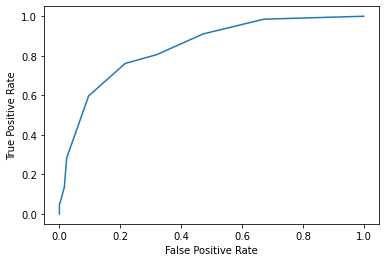

In [44]:
#ROC Curve for KNN model

from sklearn.metrics import auc, roc_curve, roc_auc_score

pred_prob = knn_model.predict_proba(x_test_sc)

fpr, tpr, thresholds = roc_curve(y_test,pred_prob[:,1])

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [45]:
opt = np.sqrt(tpr*(1-fpr))

ind = np.argmax(opt)

thresholds[ind]

0.5

In [46]:
new_df = pd.DataFrame({"actual_values":y_test, "pred_prob":pred_prob[:,1]})

new_df["new_pred"] = np.where(new_df["pred_prob"]>=0.5,1,0)

confusion_matrix(new_df["actual_values"], new_df["new_pred"])

array([[98, 27],
       [16, 51]], dtype=int64)

In [47]:
accuracy_score(new_df["actual_values"], new_df["new_pred"])

0.7760416666666666

In [48]:
print(classification_report(new_df["actual_values"], new_df["new_pred"]))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       125
           1       0.65      0.76      0.70        67

    accuracy                           0.78       192
   macro avg       0.76      0.77      0.76       192
weighted avg       0.79      0.78      0.78       192



In [49]:
#Conclusion for KNN Model:

#Accuracy Score for Test data: 0.796875
#Accuracy Score for Train data: 0.7934027777777778

#FN is 27 
#Sensitivity = 60

#After performing with best Thershold using ROC Curve
#Accuracy Score for Test data: 0.7760416666666666
#Accuracy Score for Train data: 0.7934027777777778

#FN is 16
#Sensitivity = 76

#### Random Forest Algorithm

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

In [51]:
RF_model.fit(x_train_sc,y_train)

RandomForestClassifier()

In [52]:
y_pred = RF_model.predict(x_test_sc)

In [53]:
print('Accuracy Score for Test data', accuracy_score(y_test,y_pred))
print('Accuracy Score for Train data', accuracy_score(y_train,RF_model.predict(x_train_sc)))

#RF Model is overfitting. Hence Lets tune with hyperparameter

Accuracy Score for Test data 0.8229166666666666
Accuracy Score for Train data 1.0


In [54]:
#Tuning

param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

RF_model = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=RF_model, param_grid = param_grid_rf, scoring="accuracy", cv =None,
                       return_train_score=True)

rf_grid_fit = rf_grid.fit(X,y)

rf_grid_fit.best_params_

<IPython.core.display.Javascript object>

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [81]:
RF_model = RandomForestClassifier(criterion = 'entropy',
                             max_depth = 8,
                             max_features =  'auto',
                             n_estimators=  200)

RF_model.fit(x_train_sc,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=200)

In [82]:
y_pred = RF_model.predict(x_test_sc)

print('Accuracy Score for Test data', accuracy_score(y_test,y_pred))
print('Accuracy Score for Train data', accuracy_score(y_train,RF_model.predict(x_train_sc)))

Accuracy Score for Test data 0.8177083333333334
Accuracy Score for Train data 0.9409722222222222


In [83]:
pd.DataFrame(y_pred).value_counts()

0    126
1     66
dtype: int64

In [84]:
confusion_matrix(y_test,y_pred)

array([[108,  17],
       [ 18,  49]], dtype=int64)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       125
           1       0.74      0.73      0.74        67

    accuracy                           0.82       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.82      0.82      0.82       192



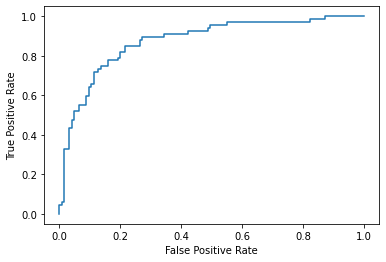

In [86]:
#ROC Curve for Random Forest

pred_prob = RF_model.predict_proba(x_test_sc)

fpr, tpr, thresholds = roc_curve(y_test,pred_prob[:,1])

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [87]:
opt = np.sqrt(tpr*(1-fpr))

ind = np.argmax(opt)

thresholds[ind]

0.38939705281639114

In [88]:
new_df = pd.DataFrame({"actual_values":y_test, "pred_prob":pred_prob[:,1]})

new_df["new_pred"] = np.where(new_df["pred_prob"]>=0.38,1,0)

confusion_matrix(new_df["actual_values"], new_df["new_pred"])

array([[96, 29],
       [10, 57]], dtype=int64)

In [89]:
accuracy_score(new_df["actual_values"], new_df["new_pred"])

0.796875

In [90]:
print(classification_report(new_df["actual_values"], new_df["new_pred"]))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       125
           1       0.66      0.85      0.75        67

    accuracy                           0.80       192
   macro avg       0.78      0.81      0.79       192
weighted avg       0.82      0.80      0.80       192



In [65]:
#Conclusion for Random Forest Model:

#Accuracy Score for Test data: 0.8177083333333334
#Accuracy Score for Train data: 0.9409722222222222

#FN is 18
#Sensitivity = 73

#After performing with best Thershold using ROC Curve
#Accuracy Score for Test data: 0.796875
#Accuracy Score for Train data: 0.9409722222222222

#FN is 10
#Sensitivity = 85

#### Decision Tree Algorithm

In [66]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()

In [67]:
DT_model.fit(x_train_sc,y_train)

DecisionTreeClassifier()

In [68]:
y_pred = DT_model.predict(x_test_sc)

In [69]:
print('Accuracy Score for Test data:',accuracy_score(y_test,y_pred))
print('Accuracy Score for Train data:',accuracy_score(y_train,DT_model.predict(x_train_sc)))

#DT Model is overfitting. Hence Lets tune with hyperparameter

Accuracy Score for Test data: 0.7708333333333334
Accuracy Score for Train data: 1.0


In [70]:
#Tuning for DT Model

param_grid_dt = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

DT_model = DecisionTreeClassifier()

dt_grid = GridSearchCV(estimator=DT_model, param_grid = param_grid_dt, scoring="accuracy", cv =None,
                       return_train_score=True)

dt_grid_fit = dt_grid.fit(X,y)

dt_grid_fit.best_params_

<IPython.core.display.Javascript object>

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2'}

In [71]:
#Lets build the DT model with best params

DT_model = DecisionTreeClassifier(ccp_alpha = 0.01, criterion = 'entropy', max_depth = 6, max_features = 'log2' )

DT_model.fit(x_train_sc,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       max_features='log2')

In [72]:
y_pred = DT_model.predict(x_test_sc)

print('Accuracy Score for Test data:',accuracy_score(y_test,y_pred))
print('Accuracy Score for Train data:',accuracy_score(y_train,DT_model.predict(x_train_sc)))

Accuracy Score for Test data: 0.7708333333333334
Accuracy Score for Train data: 0.7916666666666666


In [73]:
confusion_matrix(y_test,y_pred)

array([[105,  20],
       [ 24,  43]], dtype=int64)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       125
           1       0.68      0.64      0.66        67

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



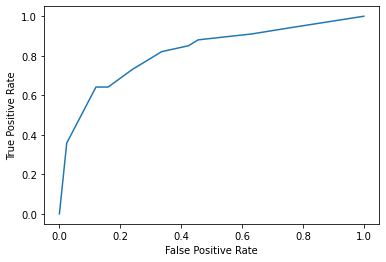

In [75]:
#ROC Curve for Decision Tree

pred_prob = DT_model.predict_proba(x_test_sc)

fpr, tpr, thresholds = roc_curve(y_test,pred_prob[:,1])

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [76]:
opt = np.sqrt(tpr*(1-fpr))

ind = np.argmax(opt)

thresholds[ind]

0.6559139784946236

In [91]:
new_df = pd.DataFrame({"actual_values":y_test, "pred_prob":pred_prob[:,1]})

new_df["new_pred"] = np.where(new_df["pred_prob"]>=0.65,1,0)

confusion_matrix(new_df["actual_values"], new_df["new_pred"])

array([[119,   6],
       [ 35,  32]], dtype=int64)

In [92]:
accuracy_score(new_df["actual_values"], new_df["new_pred"])

0.7864583333333334

In [93]:
print(classification_report(new_df["actual_values"], new_df["new_pred"]))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       125
           1       0.84      0.48      0.61        67

    accuracy                           0.79       192
   macro avg       0.81      0.71      0.73       192
weighted avg       0.80      0.79      0.77       192



In [80]:
#Conclusion for Decision Tree Model:

#Accuracy Score for Test data: 0.7708333333333334
#Accuracy Score for Train data: 0.7916666666666666

#FN is 24
#Sensitivity = 64

#After performing with best Thershold using ROC Curve
#Accuracy Score for Test data: 0.7864583333333334
#Accuracy Score for Train data: 0.7916666666666666

#FN is 35
#Sensitivity = 48

# Final Conclusion

## Conclusion for KNN Model:

Accuracy Score for Test data: 0.796875

Accuracy Score for Train data: 0.7934027777777778

FN is 27 

Sensitivity = 60

#### After performing with best Thershold using ROC Curve:

Accuracy Score for Test data: 0.7760416666666666

Accuracy Score for Train data: 0.7934027777777778

FN is 16

Sensitivity = 76


## Conclusion for Random Forest Model:

Accuracy Score for Test data: 0.8177083333333334

Accuracy Score for Train data: 0.9409722222222222

FN is 18

Sensitivity = 73

#### After performing with best Thershold using ROC Curve:

Accuracy Score for Test data: 0.796875

Accuracy Score for Train data: 0.9409722222222222

FN is 10

Sensitivity = 85

### Conclusion for Decision Tree Model:

Accuracy Score for Test data: 0.7708333333333334

Accuracy Score for Train data: 0.7916666666666666

FN is 24

Sensitivity = 64

#### After performing with best Thershold using ROC Curve:
Accuracy Score for Test data: 0.7864583333333334

Accuracy Score for Train data: 0.7916666666666666

FN is 35

Sensitivity = 48

# Observations:

#### Here our major focus is to reduce the FN (False Negative means acutally it is postive(1) but model says negative(0)). Since it is healthcare, Going with Recall metric (Sensitivity)

#### By performing the above three models, I conclude that Random Forest Model is preforming best with Sensitivity 85% and FN is 10.

#### If we go with accuracy score point of view Decision Tree model performs well with test accuracy 78% and train accuracy 79% but out major focus is to reduce the FN, In Decision Tree model Sensitivity 48% and FN is 35.

#### KNN Model is also performs well with accuracy score of test data 77%, train data 79% and got FN is 16 and Sensitivity is 76%. But comparatively Random Forest Model performs well.